$\newline$
#### [$${\bf{\text{Denoising by Using SWT}}}$$](https://pywavelets.readthedocs.io/en/latest/ref/swt-stationary-wavelet-transform.html)
$\newline$

$\newline$
${\bf{\text{}}}$
$\newline$
- [${\bf{\text{Loading Image and Creating Noisy Image}}}$](#1)
$\newline$
- - [${\bf{\text{Changing Data Type of the Noisy Image and Original Image for Bilateral Filter}}}$](#2)
$\newline$
- [${\bf{\text{Mother Wavelets}}}$](#3)
$\newline$
- [${\bf{\text{Denoising by using Wavelet Transform(WT)}}}$](#4)
$\newline$
- - [${\bf{\text{Evaluation}}}$](#6)
$\newline$
- [${\bf{\text{Denoising by using SWT}}}$](#5)
$\newline$
- - [${\bf{\text{Evaluation}}}$](#7)
$\newline$
- [${\bf{\text{Denoising by using DWT}}}$](#8)
$\newline$
- - [$\bf{\text{Evaluation}}$](#9)
$\newline$

In [1]:
import os
import cv2
import pywt
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

$\newline$
- <a name='1'>${\bf{\text{Loading Image and Creating Noisy Image}}}$</a>
$\newline$

$\newline$
- - <a name='2'>${\bf{\text{Changing Data Type of the Noisy Image and Original Image for Bilateral Filter}}}$</a>
$\newline$

In [2]:
path_str = os.getcwd() + '/'
img_name = 'cameraman.jpg'

In [3]:
def min_max_scaler(input_img: np.ndarray, data_range: tuple=(0, 1)) -> np.ndarray:
    img = input_img.copy()
    a, b = data_range[0], data_range[1]
    img = (img - img.min()) / (img.max() - img.min())
    img *= (b - a)
    img += a
    return img

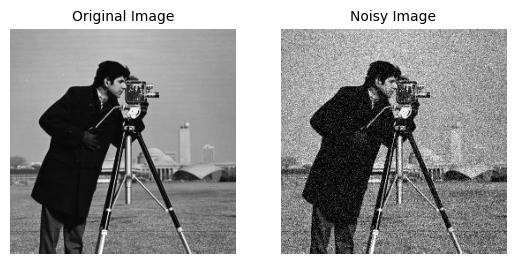

In [4]:
img_orig_gray_ndarray = cv2.imread(path_str + img_name, 0)
img_orig_gray_ndarray = min_max_scaler(img_orig_gray_ndarray)
img_orig_gray_ndarray = img_orig_gray_ndarray.astype(np.float32)

img_noisy_ndarray = random_noise(image=img_orig_gray_ndarray, mode='gaussian', seed=0, var=0.01, mean=0)
img_noisy_ndarray = img_noisy_ndarray.astype(np.float32)

plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(img_orig_gray_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Original Image', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(img_noisy_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Noisy Image', fontsize=10)
plt.show()

In [5]:
print(f'\n{colored("Original Image", "blue")}: \n\n{img_orig_gray_ndarray}\n')
print(f' ... and {colored("shape", "blue")} of this: {img_orig_gray_ndarray.shape}')
print(f'\n ... and its {colored("data type", "blue")}: {colored(img_orig_gray_ndarray.dtype, "green")}\n\n')


Original Image: 

[[0.6156863  0.6156863  0.6156863  ... 0.5921569  0.6        0.6039216 ]
 [0.6156863  0.6156863  0.6156863  ... 0.6        0.6        0.6       ]
 [0.61960787 0.61960787 0.61960787 ... 0.60784316 0.6        0.59607846]
 ...
 [0.44313726 0.5294118  0.47843137 ... 0.50980395 0.5294118  0.40784314]
 [0.49803922 0.47058824 0.47843137 ... 0.5254902  0.52156866 0.4862745 ]
 [0.44313726 0.5372549  0.5137255  ... 0.5176471  0.49803922 0.41568628]]

 ... and shape of this: (256, 256)

 ... and its data type: float32




In [6]:
print(f'\n{colored("Noisy Image", "blue")}: \n\n{img_noisy_ndarray}\n')
print(f' ... and {colored("shape", "blue")} of this: {img_noisy_ndarray.shape}')
print(f'\n ... and its {colored("data type", "blue")}: {colored(img_noisy_ndarray.dtype, "green")}\n\n')


Noisy Image: 

[[0.6282593  0.6024758  0.67972857 ... 0.4999935  0.6804717  0.68919647]
 [0.5489176  0.6320107  0.5326111  ... 0.5291535  0.57096004 0.61429137]
 [0.5652121  0.6062627  0.749395   ... 0.5773632  0.60088617 0.57635045]
 ...
 [0.51911294 0.27266556 0.3699326  ... 0.57211    0.639319   0.48081118]
 [0.5402246  0.5513061  0.49047777 ... 0.63716435 0.6014341  0.42078286]
 [0.49783072 0.6791294  0.5577653  ... 0.44500536 0.5286573  0.4056032 ]]

 ... and shape of this: (256, 256)

 ... and its data type: float32




In [7]:
X = img_orig_gray_ndarray
X_hat = img_noisy_ndarray

psnr_orig_and_denoised_swt = peak_signal_noise_ratio(image_true=X, \
                                              image_test=X_hat, data_range=1)

print(f'\nType of X: {colored(X.dtype, "blue")}\n')
print(f'Type of X\u0302: {colored(X.dtype, "blue")}\n')
print(f'\n{colored("PSNR", "blue")} without Denoising: {psnr_orig_and_denoised_swt}')

M = X.shape[0] * X.shape[1]
MSE_swt_denoising = np.sum((X - X_hat) ** 2) / (2 * M)
print(f'\n{colored("MSE", "blue")} without Denoising: {MSE_swt_denoising}\n')


Type of X: float32

Type of X̂: float32


PSNR without Denoising: 20.400405933403135

MSE without Denoising: 0.0045596277341246605



$\newline$
- <a name='3'>${\bf{\text{Mother Wavelets}}}$</a>
$\newline$

In [8]:
wavelet_list = pywt.wavelist(kind='discrete')
print(f'\n{colored("Mother Wavelets", "blue")}:\n\n{wavelet_list}')


Mother Wavelets:

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


$\newline$
- <a name='4'>${\bf{\text{Denoising by using Wavelet Transform(WT)}}}$</a>
$\newline$

In [9]:
img_denoised_wavelet = denoise_wavelet(image=img_noisy_ndarray, wavelet='db1', mode='soft', method='BayesShrink')

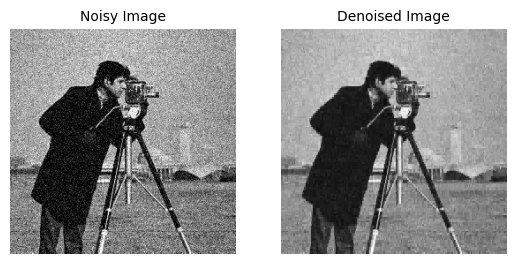

In [10]:
plt.figure(2)
plt.subplot(1, 2, 1), plt.imshow(img_noisy_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Noisy Image', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(img_denoised_wavelet, cmap='gray'), plt.axis('off'), \
plt.title('Denoised Image', fontsize=10)
plt.show()

In [11]:
print(f'\n{colored("Denoised Image", "blue")} by using {colored("WT", "blue")}:\n')
print(img_denoised_wavelet)
print(f'\n ... and {colored("Shape", "blue")} of this: {colored(img_denoised_wavelet.shape, "blue")}\n')
print(f'\n ... and its {colored("data type", "blue")}: {colored(img_denoised_wavelet.dtype, "blue")}\n')


Denoised Image by using WT:

[[0.6060218  0.6060218  0.64083815 ... 0.57771647 0.5985029  0.5985029 ]
 [0.6060218  0.6060218  0.64083815 ... 0.57771647 0.5985029  0.5985029 ]
 [0.6060218  0.6060218  0.6457672  ... 0.5985029  0.5985029  0.5985029 ]
 ...
 [0.48585758 0.4132795  0.44956854 ... 0.49659097 0.4882819  0.4882819 ]
 [0.5513324  0.5513324  0.5513324  ... 0.475553   0.48780927 0.46329674]
 [0.5513324  0.5513324  0.5513324  ... 0.475553   0.48780927 0.46329674]]

 ... and Shape of this: (256, 256)


 ... and its data type: float32



$\newline$
- - <a name='6'>${\bf{\text{Evaluation}}}$</a>
$\newline$

In [12]:
X = img_orig_gray_ndarray
X_hat = img_denoised_wavelet

psnr_orig_and_denoised_wt = peak_signal_noise_ratio(image_true=X, \
                                              image_test=X_hat, data_range=1)

print(f'\nType of X: {colored(X.dtype, "blue")}\n')
print(f'Type of X\u0302: {colored(X.dtype, "blue")}\n')
print(f'\n{colored("PSNR", "blue")} for Denoising by {colored("WT", "blue")}: {psnr_orig_and_denoised_wt}')

M = X.shape[0] * X.shape[1]
MSE_wavelet_denoising = np.sum((X - X_hat) ** 2) / (2 * M)
print(f'\n{colored("MSE", "blue")} for Denoisig {colored("WT", "blue")}: {MSE_wavelet_denoising}\n')


Type of X: float32

Type of X̂: float32


PSNR for Denoising by WT: 25.51626572741156

MSE for Denoisig WT: 0.0014039234956726432



$\newline$
- <a name='5'>${\bf{\text{Denoising by using SWT}}}$</a>
$\newline$

In [13]:
import denoising

In [15]:
def swt_denoising(img_gray_noisy: np.ndarray, mother_wavelet: str='db1', \
                  levels: int=3, mode: str='bilateral') -> np.ndarray:
    
    input_img = img_gray_noisy.copy()
    swt_list = pywt.swt2(data=input_img, wavelet=mother_wavelet, level=levels, axes=(0, 1))
    
    c = []
    for level in range(levels):
        
        a = list(swt_list[level])
        b = list(a[1])
        for i in range(3):
            
            if mode == 'gaussian':
                b[i] = denoising.gaussian_blur_filter(img_gray=b[i])
            elif mode == 'bilateral':
                b[i] = denoising.bilateral_filter(img_gray=b[i])
            elif mode == 'median':
                b[i] = denoising.median_filter(img_gray=b[i])
                
        a[1] = tuple(b) 
        c.append(tuple(a)) 
        
    denoised_img = pywt.iswt2(c, wavelet=mother_wavelet, axes=(0, 1))
    return denoised_img

In [16]:
max_level = pywt.swt_max_level(len(img_noisy_ndarray))

In [17]:
img_denoised_swt = swt_denoising(img_gray_noisy=img_noisy_ndarray, \
                                 levels=max_level - 5, mode='median', mother_wavelet='bior1.3')

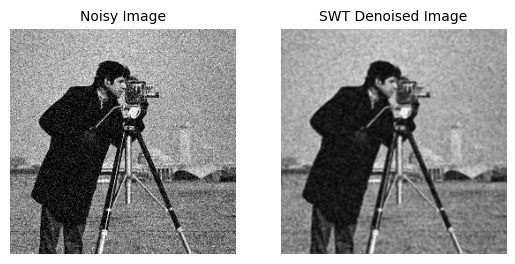

In [18]:
plt.figure(3)
plt.subplot(1, 2, 1), plt.imshow(img_noisy_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Noisy Image', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(img_denoised_swt, cmap='gray'), plt.axis('off'), \
plt.title('SWT Denoised Image', fontsize=10)
plt.show()

$\newline$
- - <a name='7'>${\bf{\text{Evaluation}}}$</a>
$\newline$

In [19]:
X = img_orig_gray_ndarray
X_hat = img_denoised_swt

psnr_orig_and_denoised_swt = peak_signal_noise_ratio(image_true=X, \
                                              image_test=X_hat, data_range=1)

print(f'\nType of X: {colored(X.dtype, "blue")}\n')
print(f'Type of X\u0302: {colored(X.dtype, "blue")}\n')
print(f'\n{colored("PSNR", "blue")} for Denoising by {colored("SWT", "blue")}: {psnr_orig_and_denoised_swt}')

M = X.shape[0] * X.shape[1]
MSE_swt_denoising = np.sum((X - X_hat) ** 2) / (2 * M)
print(f'\n{colored("MSE", "blue")} for Denoising by {colored("SWT", "blue")}: {MSE_swt_denoising}\n')


Type of X: float32

Type of X̂: float32


PSNR for Denoising by SWT: 24.48676379969916

MSE for Denoising by SWT: 0.001779482001438737



$\newline$
- <a name='8'>${\bf{\text{Denoising by using DWT}}}$</a>
$\newline$

In [20]:
def dwt_denoising(img_gray_noisy: np.ndarray, mother_wavelet: str='db1', mode: str='bilateral') -> np.ndarray:
    
    input_img = img_gray_noisy.copy()
    dwt_list = pywt.dwt2(data=input_img, wavelet=mother_wavelet, axes=(0, 1))
    
    c = []
    a = list(dwt_list[1])
    for i in range(3):

        if mode == 'gaussian':
            a[i] = denoising.gaussian_blur_filter(img_gray=a[i])
        elif mode == 'bilateral':
            a[i] = denoising.bilateral_filter(img_gray=a[i])
        elif mode == 'median':
            a[i] = denoising.median_filter(img_gray=a[i])

    c.append(dwt_list[0])
    c.append(tuple(a))
    c = tuple(c)
        
    denoised_img = pywt.idwt2(c, wavelet=mother_wavelet, axes=(0, 1))
    return denoised_img

In [21]:
img_denoised_dwt = dwt_denoising(img_gray_noisy=img_noisy_ndarray, \
                                 mode='median', mother_wavelet='db20')

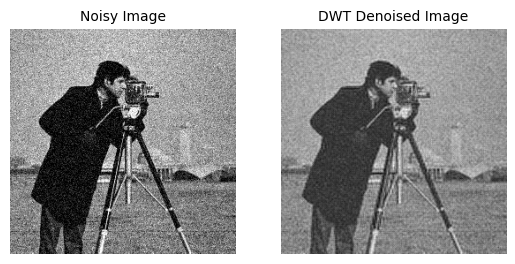

In [22]:
plt.figure(4)
plt.subplot(1, 2, 1), plt.imshow(img_noisy_ndarray, cmap='gray'), plt.axis('off'), \
plt.title('Noisy Image', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(img_denoised_dwt, cmap='gray'), plt.axis('off'), \
plt.title('DWT Denoised Image', fontsize=10)
plt.show()

$\newline$
- - <a name='9'>${\bf{\text{Evaluation}}}$</a>
$\newline$

In [23]:
X = img_orig_gray_ndarray
X_hat = img_denoised_dwt

psnr_orig_and_denoised_swt = peak_signal_noise_ratio(image_true=X, \
                                              image_test=X_hat, data_range=1)

print(f'\nType of X: {colored(X.dtype, "blue")}\n')
print(f'Type of X\u0302: {colored(X.dtype, "blue")}\n')
print(f'\n{colored("PSNR", "blue")} for {colored("DWT", "blue")}: {psnr_orig_and_denoised_swt}')

M = X.shape[0] * X.shape[1]
MSE_swt_denoising = np.sum((X - X_hat) ** 2) / (2 * M)
print(f'\n{colored("MSE", "blue")} for {colored("DWT", "blue")}: {MSE_swt_denoising}\n')


Type of X: float32

Type of X̂: float32


PSNR for DWT: 22.55637889128481

MSE for DWT: 0.002775441622361541



- <a name=''>${\bf{\text{Evaluation}}}$</a>

In [24]:
X_hat = denoising.median_filter(img_noisy_ndarray)
X_true = img_orig_gray_ndarray

In [27]:
psnr = peak_signal_noise_ratio(image_true=X_true, \
                                              image_test=X_hat, data_range=1)

print(f'\n{colored("PSNR", "blue")} without SWT: {colored(psnr, "blue")}\n')


PSNR without SWT: 24.181811192986302



- [x] **The End**